
# <font color ="#4cd137" >  **Nirdesh's Pokemon Journey** </h1> <font color="#95a5a6"><h6> &nbsp; *with Pandas*</h6> </font>



<img src="img/nirdesh_pokemon_journey_header.png"/>

In [8]:
#importing pokemon.csv from datasets folder
df_poke = pd.read_csv("datasets/pokemon.csv",index_col=None)
# total number of pokemon
print('Total number of pokemon:',len(df_poke.index))


NameError: name 'pd' is not defined

In [9]:
#looking at the columns
df_poke.info()

NameError: name 'df_poke' is not defined

In [10]:
#looking at the first five rows of data
df_poke.head(5)

NameError: name 'df_poke' is not defined

In [4]:
#cleaning the data, we donot need japanese name, before doing so we will check if the column exists, as once delted
#it can't be delted twice and will throw and error or we have to rerun the code above it
if 'japanese_name' in df_poke.columns:
    del df_poke['japanese_name']
df_poke.info()
rearranged = False

NameError: name 'df_poke' is not defined

In [5]:
#rearraning the columns

if not rearranged:
    df_poke=df_poke[[
    'name',
    'type1',
    'type2',
    'abilities',
    'attack',
    'defense',
    'experience_growth',
    'sp_defense',
    'sp_attack',
    'speed',
    'hp',
    'against_bug',
    'against_dark' ,
    'against_dragon',
    'against_electric',
    'against_fairy',
    'against_fight',
    'against_fire',
    'against_flying',
    'against_ghost',
    'against_grass',
    'against_ground',
    'against_ice',
    'against_normal',
    'against_poison',
    'against_psychic',
    'against_rock',
    'against_steel',
    'against_water',
    'base_egg_steps',
    'base_happiness',
    'base_total',
    'capture_rate',
    'classfication',
    'height_m',
    'percentage_male',
    'pokedex_number',
    'weight_kg',
    'generation',
    'is_legendary']]
    rearranged = True

NameError: name 'rearranged' is not defined

In [6]:
df_poke.head()

NameError: name 'df_poke' is not defined

In [7]:

#there are common values in type1 and type two while looking at few of the data 
#also all the pokemon might not hav type two ie has value nan*/
#also some have same type1 and type2 so type2 is redundant
df_poke.loc[[25,27,30,33,38,40,42,45,49,64,69,74,75,80,100,130,150,180,200,210,240,380,300,350,380,400,450,500,560,600,650,690,750,800],['name','type1','type2']]

NameError: name 'df_poke' is not defined

In [9]:
#counting type1 and type2 of pokemon
pokemon_type1 = df_poke.loc[:,'type1'].nunique(dropna=True)
pokemon_type2 = df_poke.loc[:,'type2'].nunique(dropna=True)
print("Total primary types of Pokemon:" ,pokemon_type1)
print("Total secondary types of Pokemon:" ,pokemon_type2)
print("\nAll types of Pokemon: \n", df_poke['type1'].unique())


Total primary types of Pokemon: 18
Total secondary types of Pokemon: 18

All types of Pokemon: 
 ['grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric' 'ground'
 'fairy' 'fighting' 'psychic' 'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel'
 'flying']


In [10]:
#for pokemon having both types same, making type2 None
for i in df_poke.index:
    if df_poke.loc[i,'type1']==df_poke.loc[i,'type2']:
        print(i,df_poke.loc[i,'name'],df_poke.loc[i,'type1'],df_poke.loc[i,'type1'])
        df_poke.loc[i,'type2']=None


25 Raichu electric electric
49 Diglett ground ground
50 Dugtrio ground ground
87 Grimer poison poison
88 Muk poison poison
491 Shaymin grass grass
554 Darmanitan fire fire


# Looking at Pokemon distribution according to type


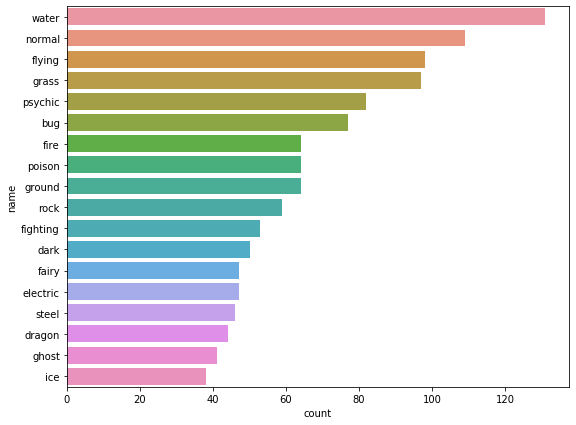

In [11]:
#finding types of pokemon irrespective of type1 or type2 ie merging types
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sequential_colors = sns.color_palette("PuBu", 2)
dict_count=df_poke['type1'].dropna().append(df_poke['type2'].dropna()).value_counts().to_dict()
df_type_count= pd.DataFrame({'name':list(dict_count.keys()),'count':list(dict_count.values()) })
plt.figure(figsize=(9, 7))
sns.barplot(y='name', x='count',data=df_type_count)


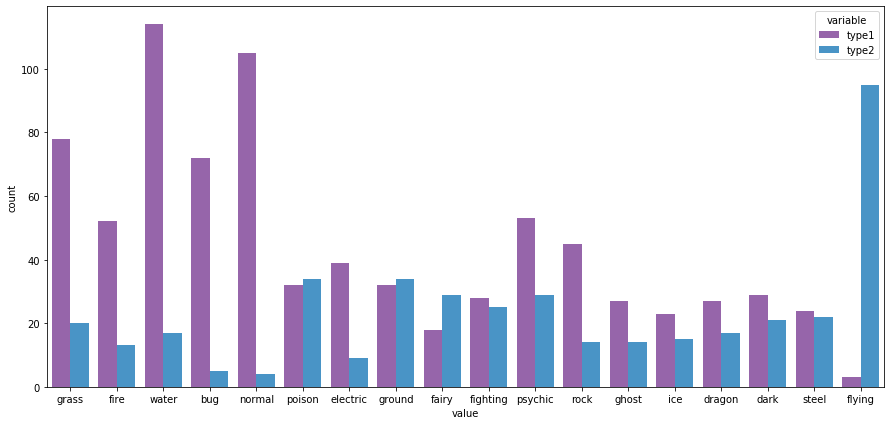

In [241]:

df = pd.DataFrame(df_poke.loc[:,['type1','type2']], columns=['type1','type2'])
plt.figure(figsize=(15, 7))
sns.set_palette(flatui)
sns.countplot(x="value", hue="variable", data=pd.melt(df))

plt.show()

In [251]:
print(df_poke[df_poke['type1']=='normal'].loc[:,['name','type1','type2']])
print(df_poke[df_poke['type1']=='normal'].count(axis=0))
print(df_poke[df_poke['type2']=='flying'].count(axis=0))

           name   type1    type2
15   Pidgey      normal  flying 
16   Pidgeotto   normal  flying 
17   Pidgeot     normal  flying 
18   Rattata     normal  dark   
19   Raticate    normal  dark   
..        ...       ...   ...   
764  Oranguru    normal  psychic
771  Type: Null  normal  NaN    
772  Silvally    normal  NaN    
774  Komala      normal  NaN    
779  Drampa      normal  dragon 

[105 rows x 3 columns]
abilities            105
against_bug          105
against_dark         105
against_dragon       105
against_electric     105
against_fairy        105
against_fight        105
against_fire         105
against_flying       105
against_ghost        105
against_grass        105
against_ground       105
against_ice          105
against_normal       105
against_poison       105
against_psychic      105
against_rock         105
against_steel        105
against_water        105
attack               105
base_egg_steps       105
base_happiness       105
base_total           105
captu

## Some fun with images

In [252]:
#creating new column for images
def create_filename(x):
    return '0'*(3 - len(str(x)))+str(x)
# df_poke['image']=df_poke.pokedex_number.map(lambda x: f'img/pokedex/{x}.png')

df_poke['image']=df_poke.pokedex_number.map(lambda x: f'img/pokedex/{create_filename(x)}.png')

df_poke['image']

0      img/pokedex/001.png
1      img/pokedex/002.png
2      img/pokedex/003.png
3      img/pokedex/004.png
4      img/pokedex/005.png
              ...         
796    img/pokedex/797.png
797    img/pokedex/798.png
798    img/pokedex/799.png
799    img/pokedex/800.png
800    img/pokedex/801.png
Name: image, Length: 801, dtype: object

In [253]:



def path_to_image_html(path):
    return '<img src="'+ path + '"/>'

pd.set_option('display.max_colwidth', -1)

style = '''<style>
            
             .card-view tr,.card-view th,.card-view td{
                box-sizing:border-box !important;
                border:0px solid rgba(0,0,0,);
            }
            .card-view thead{
                display:none !important;
                border:0px solid rgba(0,0,0,0) !important;
            }
            
            
            .card-view tr{
                box-shadow: 0px 5px 6px 0px rgba(0, 0, 0, .14);
                border-radius: 6px !important;
                width: 280px !important;
                display: block;
                padding: 0;
                margin: 15px 0px;
                overflow: hidden;
                background: #3f3f3f !important;
                color: #fff;
                transition:0.3s ease
                
            }
           
            .card-view tr:hover{
                box-shadow:0px 5px 6px 0px rgba(73,227,114,.2)  !important;
                transition: 0.3s;
            }
            
            .card-view tr>th{
                display:none !important;
            }
           
            .card-view tr>td{
                padding:0;
                margin:0;
                display: inline-block !important; 
                text-transform:uppercase;
                width:60px !important;
                font-size:10px !important;
                font-weight:400 !important;
                height:17px !important;
                line-height:17px !important;
                float:left;
                text-align:left !important;
                position:relative !important;
                
            }
            
            .card-view tr>td>img{
                display: block;
                position: relative;
                z-index: 100;
            }
            .card-view tr>td:nth-of-type(1){
                width:80px !important;
                height:80px !important;
                background:#fff;
                border-top-right-radius:6px !important;
                border-bottom-right-radius:6px !important;
                overflow:hidden !important;
                margin-right:10px !important;
                float:left;
            }
           
            .card-view tr>td:nth-of-type(2){
                font-size:13px !important;
                font-weight:600 !important;
                width:180px !important;
                height:20px !important;
                line-height:20px !important;
                margin-bottom:2px !important;
                margin-top:4px !important;
            }
            
            
           .card-view tr>td:nth-of-type(1):after{
              background: rgba(0,0,0,0);
              height: 50px ;
              width:50px;
              border:2px solid rgba(0,0,0,.2);
              border-radius:25px;
              content: "";
              display: block;
              position: relative;
              top:-60px;
              left:14px;
              transition: 0.3s;
              z-index:10 !important;
            }
                       
           
            .card-view tr:hover>td:nth-of-type(1):after{
                border:2px solid rgba(84,181,107,0) !important;
                background:rgba(73,227,114,.5) !important;
                
            }
            
            .card-view tr>td:before{
                  padding-right:10px;
                  font-weight:600;
                  
            }
                       
            .card-view tr>td:nth-of-type(3):before{content:"At:";color:#EE5A24}
            .card-view tr>td:nth-of-type(4):before{content:"DF:";color:#12CBC4}
            .card-view tr>td:nth-of-type(5):before{content:"HP:";color:#9980FA}
            .card-view tr>td:nth-of-type(6):before{content:"Type";color:#ED4C67}
            /*.card-view tr>td:nth-of-type(6),.card-view tr>td:nth-of-type(7){width:80px !important}*/
            .card-view tr>td:nth-of-type(8):before{content:"is Legendary";color:#F79F1F}
                       
            
            
            .card-view tr>td:last-of-type{
                width:180px !important
            }
            
            
            </style>'''

HTML(style+df_poke[››››['image','name','attack','defense','hp','type1','type2','is_legendary']].to_html(classes='card-view',escape=False ,formatters=dict(image=path_to_image_html)))


SyntaxError: invalid character in identifier (<ipython-input-253-dae74f5351fc>, line 128)

           name    type1   type2  is_legendary  generation
0    Bulbasaur   grass    poison  0             1         
1    Ivysaur     grass    poison  0             1         
2    Venusaur    grass    poison  0             1         
3    Charmander  fire     NaN     0             1         
4    Charmeleon  fire     NaN     0             1         
..          ...   ...     ...    ..            ..         
796  Celesteela  steel    flying  1             7         
797  Kartana     grass    steel   1             7         
798  Guzzlord    dark     dragon  1             7         
799  Necrozma    psychic  NaN     1             7         
800  Magearna    steel    fairy   1             7         

[801 rows x 5 columns]


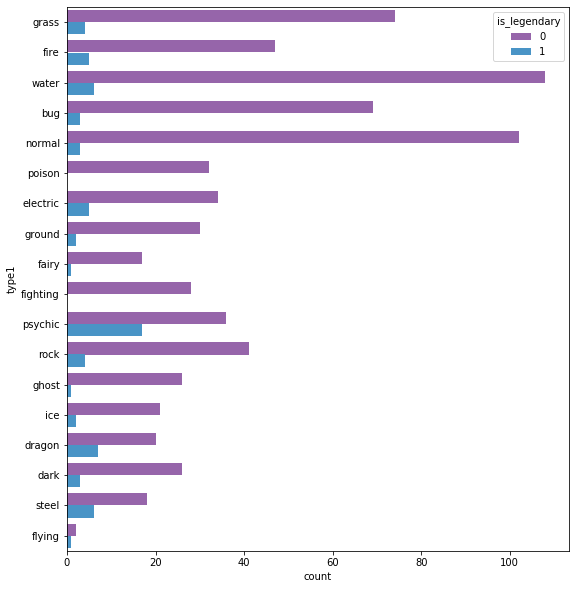

In [254]:
print(df_poke.loc[:,['name','type1','type2','is_legendary','generation']])
plt.figure(figsize=(9, 10))
sns.set_palette(flatui)
ax = sns.countplot(y="type1", hue="is_legendary", data=df_poke)


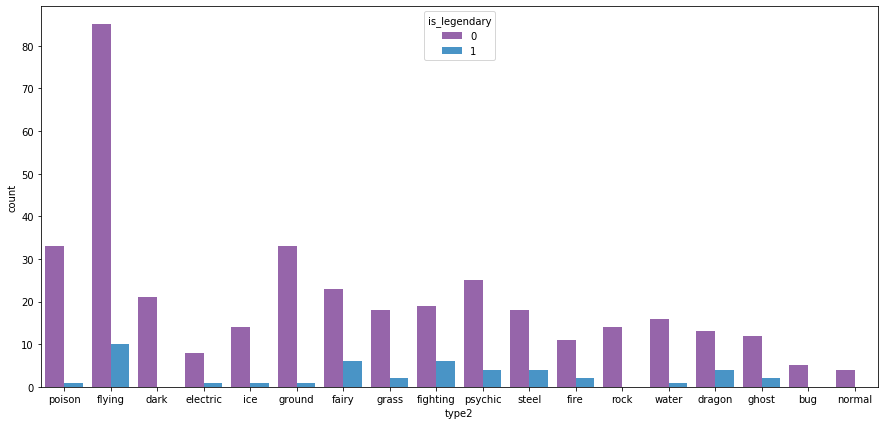

In [255]:
plt.figure(figsize=(15, 7))
sns.set_palette(flatui)
ax = sns.countplot(x="type2", hue="is_legendary", data=df_poke)


In [256]:
#total number of legendary pokemon
print(df_poke[df_poke['is_legendary']==True]['name'].count())


70


In [257]:
#all legendary pokemon
HTML(style+df_poke[df_poke['is_legendary']==True].loc[:,['image','name','attack','defense','hp','type1','type2','is_legendary']].to_html(classes='card-view',escape=False ,formatters=dict(image=path_to_image_html)))

# Now lets look at the stats

In [258]:
df_poke.loc[:,['name','attack','defense','hp','sp_defense','sp_attack','speed','is_legendary','generation']]


name  attack  defense   hp  sp_defense  sp_attack  speed  \
0    Bulbasaur   49      49       45   65          65         45      
1    Ivysaur     62      63       60   80          80         60      
2    Venusaur    100     123      80   120         122        80      
3    Charmander  52      43       39   50          60         65      
4    Charmeleon  64      58       58   65          80         80      
..          ...  ..      ..       ..   ..          ..         ..      
796  Celesteela  101     103      97   101         107        61      
797  Kartana     181     131      59   31          59         109     
798  Guzzlord    101     53       223  53          97         43      
799  Necrozma    107     101      97   89          127        79      
800  Magearna    95      115      80   115         130        65      

     is_legendary  generation  
0    0             1           
1    0             1           
2    0             1           
3    0             1           
4    0             1           
..  ..            ..           
796  1             7           
797  1             7           
798  1             7           
799  1             7           
800  1             7           

[801 rows x 9 columns]

In [259]:

#looking pokemon with weakest attack
print(df_poke.sort_values(by=['attack']).loc[:,['name','attack']].head(10))
HTML(style+df_poke.sort_values(by=['attack']).loc[:,['image','name','attack','defense','hp','type1','type2','is_legendary']].head(10).to_html(classes='card-view',escape=False ,formatters=dict(image=path_to_image_html)))
# 


         name  attack
439  Happiny   5     
112  Chansey   5     
241  Blissey   10    
212  Shuckle   10    
128  Magikarp  10    
348  Feebas    15    
174  Togepi    20    
457  Mantyke   20    
182  Marill    20    
10   Metapod   20    


In [260]:
#looking pokemon with strongest attack
print(df_poke.sort_values(by=['attack'],ascending=False).loc[:,['name','attack']].head(10))
HTML(style+df_poke.sort_values(by=['attack'],ascending=False).loc[:,['image','name','attack','defense','hp','type1','type2','is_legendary']].head(10).to_html(classes='card-view',escape=False ,formatters=dict(image=path_to_image_html)))



          name  attack
213  Heracross  185   
797  Kartana    181   
382  Groudon    180   
383  Rayquaza   180   
444  Garchomp   170   
408  Rampardos  165   
353  Banette    165   
474  Gallade    165   
247  Tyranitar  164   
288  Slaking    160   


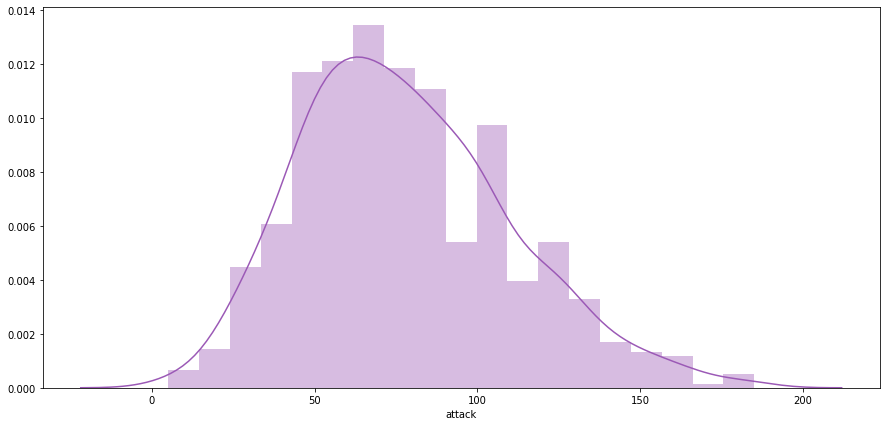

In [261]:
#looking at distribution of pokemon based on attack
sns.set_palette(flatui)
plt.figure(figsize=(15, 7))
df_st=df_poke.sort_values(by=['attack'])
sns.distplot(df_st['attack'])

In [262]:
#looking pokemon with weakest defense
print(df_poke.sort_values(by=['defense']).loc[:,['name','attack']].head(10))
HTML(style+df_poke.sort_values(by=['defense']).loc[:,['image','name','attack','defense','hp','type1','type2','is_legendary']].head(10).to_html(classes='card-view',escape=False ,formatters=dict(image=path_to_image_html)))



           name  attack
439  Happiny     5     
112  Chansey     5     
241  Blissey     10    
237  Smoochum    30    
171  Pichu       40    
173  Igglybuff   30    
62   Abra        20    
348  Feebas      15    
38   Jigglypuff  45    
317  Carvanha    90    


In [263]:
#looking pokemon with strongest defense
print(df_poke.sort_values(by=['defense'],ascending=False).loc[:,['name','attack']].head(10))
HTML(style+df_poke.sort_values(by=['defense'],ascending=False).loc[:,['image','name','attack','defense','hp','type1','type2','is_legendary']].head(10).to_html(classes='card-view',escape=False ,formatters=dict(image=path_to_image_html)))


          name  attack
305  Aggron     140   
212  Shuckle    10    
207  Steelix    125   
376  Regirock   100   
712  Avalugg    117   
90   Cloyster   95    
79   Slowbro    75    
410  Bastiodon  52    
94   Onix       45    
382  Groudon    180   


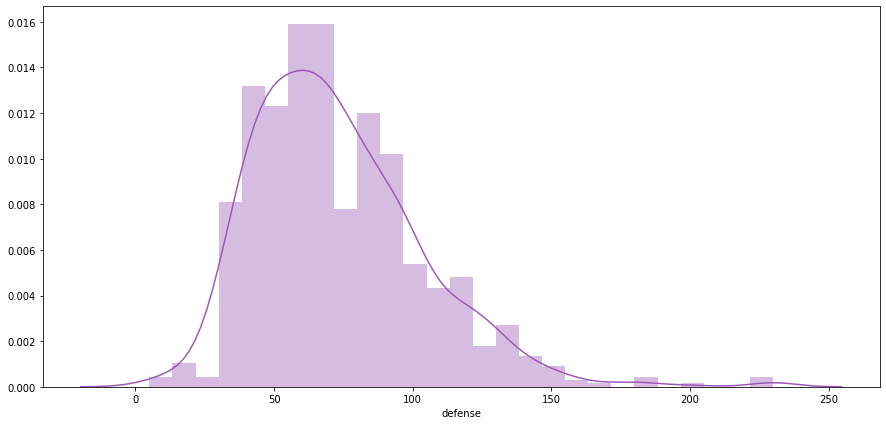

In [264]:
#looking at distribution of pokemon based on attack
sns.set_palette(flatui)
plt.figure(figsize=(15, 7))
df_st=df_poke.sort_values(by=['defense'])
sns.distplot(df_st['defense'])

In [265]:
#looking pokemon hightest health point (hp)
print(df_poke.sort_values(by=['hp'],ascending=False).loc[:,['name','attack']].head(10))
HTML(style+df_poke.sort_values(by=['hp'],ascending=False).loc[:,['image','name','attack','defense','hp','type1','type2','is_legendary']].head(10).to_html(classes='card-view',escape=False ,formatters=dict(image=path_to_image_html)))


          name  attack
241  Blissey    10    
112  Chansey    5     
798  Guzzlord   101   
717  Zygarde    100   
201  Wobbuffet  33    
320  Wailord    90    
593  Alomomola  75    
142  Snorlax    110   
486  Giratina   120   
425  Drifblim   80    


In [266]:
#looking pokemon hightest health point (hp)
print(df_poke.sort_values(by=['hp']).loc[:,['name','attack']].head(10))
HTML(style+df_poke.sort_values(by=['hp']).loc[:,['image','name','attack','defense','hp','type1','type2','is_legendary']].head(10).to_html(classes='card-view',escape=False ,formatters=dict(image=path_to_image_html)))


          name  attack
291  Shedinja   90    
49   Diglett    55    
438  Mime Jr.   25    
212  Shuckle    10    
348  Feebas     15    
171  Pichu      40    
128  Magikarp   10    
354  Duskull    40    
80   Magnemite  35    
766  Wimpod     35    


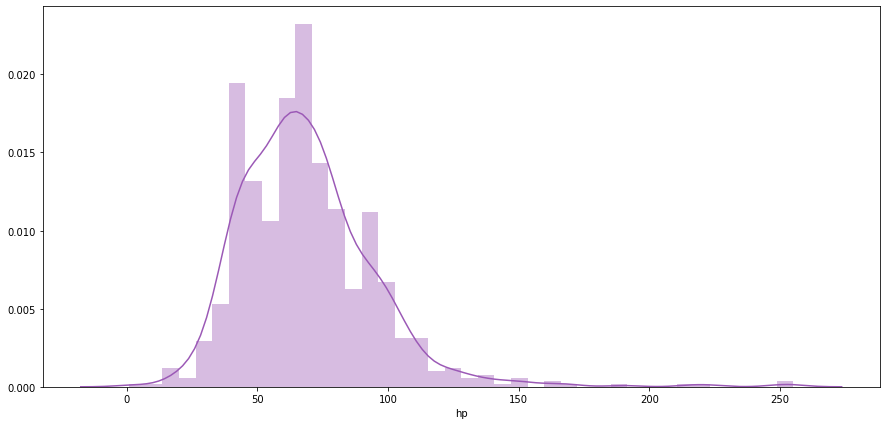

In [267]:
#looking at distribution of pokemon based on hp
sns.set_palette(flatui)
plt.figure(figsize=(15, 7))
df_st=df_poke.sort_values(by=['hp'])
sns.distplot(df_st['hp'])

choose any stat among 
attack,defense,sp_attack,hp,sp_defense,speedspeed
-----------------------------------------------------------------------
choose any type 
            
'grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric'
            
'ground' 'fairy' 'fighting' 'psychic' 
            
'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel' 'flying'
            
or input all for all the typesdragon
-----------------------------------------------------------------------
input 0 for descending, input 1 for ascending 1
-----------------------------------------------------------------------
input the number of items to be shown10
           name  speed
779  Drampa      36   
775  Turtonator  36   
632  Deino       38   
703  Goomy       40   
442  Gible       42   
798  Guzzlord    43   
690  Dragalge    44   
781  Jangmo-o    45   
695  Tyrunt      48   
620  Druddigon   48   
-----------------------------------------------------------------------


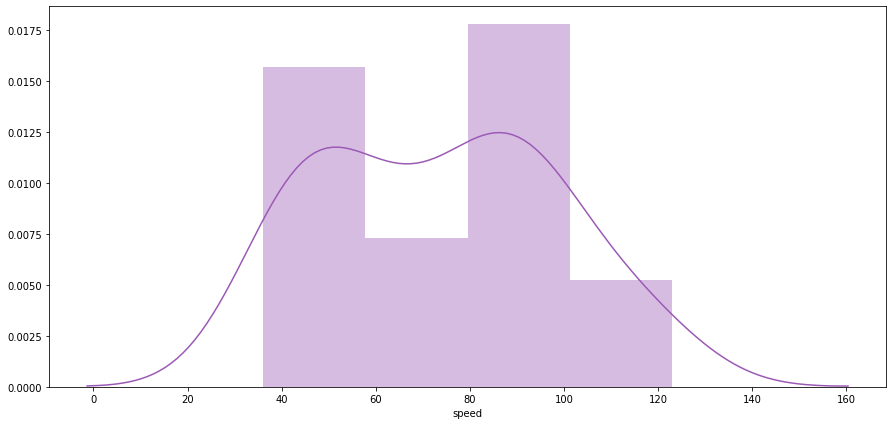

In [268]:
#looking at each stats is cubersome so here is a function
stat  = input('choose any stat among \nattack,defense,sp_attack,hp,sp_defense,speed')
print('-----------------------------------------------------------------------')
poke_type  = input('''choose any type 
            \n'grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric'
            \n'ground' 'fairy' 'fighting' 'psychic' 
            \n'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel' 'flying'
            \nor input all for all the types''')
print('-----------------------------------------------------------------------')
for_stats=int(input('input 0 for descending, input 1 for ascending '))
print('-----------------------------------------------------------------------')
number_to_show = int(input('input the number of items to be shown'))
def find_stat(stat,poke_type,for_stats,number_to_show):
    stat_list = ['attack','defense','sp_attack','sp_defense','hp','speed']
    type_list = ['all','grass' ,'fire', 'water', 'bug', 'normal' ,'poison' ,'electric' 'ground','fairy' ,'fighting' ,'psychic', 'rock' ,'ghost' ,'ice', 'dragon' ,'dark' ,'steel','flying']
    stat_type_list =[0,1]

    if not(stat.lower().strip() in stat_list and poke_type.lower().strip() in type_list and for_stats in stat_type_list ):
        raise ValueError(f'invaid stat : {stat} or invalid type : {type}')
    
    
    df_st= df_poke if poke_type == "all" else df_poke[(df_poke['type1']==poke_type) | (df_poke['type2']==poke_type)]
    df_st=df_st.sort_values(by=[stat],ascending=for_stats)
    
    print(df_st.loc[:,['name',stat]].head(number_to_show))
    print('-----------------------------------------------------------------------')
#     HTML(style+df_st.loc[:,['image','name','attack','defense','hp','type1','type2','is_legendary']].head(number_to_show).to_html(classes='card-view',escape=False ,formatters=dict(image=path_to_image_html)))
    sns.set_palette(flatui)
    plt.figure(figsize=(15, 7))
    sns.distplot(df_st[stat])
find_stat(stat,poke_type,for_stats,number_to_show)



Empty DataFrame
Columns: [name, type1, type2, abilities, attack, defense, experience_growth, sp_defense, sp_attack, speed, hp, against_bug, against_dark, against_dragon, against_electric, against_fairy, against_fight, against_fire, against_flying, against_ghost, against_grass, against_ground, against_ice, against_normal, against_poison, against_psychic, against_rock, against_steel, against_water, base_egg_steps, base_happiness, base_total, capture_rate, classfication, height_m, percentage_male, pokedex_number, weight_kg, generation, is_legendary, image, total]
Index: []

[0 rows x 42 columns]

# Looking for a total of stats

In [269]:
stats_df = df_poke.loc[:,['name','attack','defense','hp','sp_attack','sp_defense','speed']]
print(stats_df)
#creating a new column with total of all stats
df_poke['total'] = df_poke['attack']+df_poke['defense']+df_poke['hp']+df_poke['sp_attack']+df_poke['sp_defense']+df_poke['speed']


           name  attack  defense   hp  sp_attack  sp_defense  speed
0    Bulbasaur   49      49       45   65         65          45   
1    Ivysaur     62      63       60   80         80          60   
2    Venusaur    100     123      80   122        120         80   
3    Charmander  52      43       39   60         50          65   
4    Charmeleon  64      58       58   80         65          80   
..          ...  ..      ..       ..   ..         ..          ..   
796  Celesteela  101     103      97   107        101         61   
797  Kartana     181     131      59   59         31          109  
798  Guzzlord    101     53       223  97         53          43   
799  Necrozma    107     101      97   127        89          79   
800  Magearna    95      115      80   130        115         65   

[801 rows x 7 columns]


In [270]:
#pokemon with highest total stats
print(df_poke.sort_values(['total'],ascending=False).loc[:,['name','total']].head(20))


          name  total
149  Mewtwo     780  
383  Rayquaza   780  
382  Groudon    770  
381  Kyogre     770  
492  Arceus     720  
717  Zygarde    708  
380  Latios     700  
372  Salamence  700  
247  Tyranitar  700  
444  Garchomp   700  
718  Diancie    700  
379  Latias     700  
375  Metagross  700  
645  Kyurem     700  
719  Hoopa      680  
716  Yveltal    680  
715  Xerneas    680  
248  Lugia      680  
643  Zekrom     680  
791  Lunala     680  


In [271]:
#pokemon with lowest total stats
print(df_poke.sort_values(['total']).loc[:,['name','total']].head(20))


           name  total
190  Sunkern     180  
297  Azurill     190  
400  Kricketot   194  
264  Wurmple     195  
9    Caterpie    195  
12   Weedle      195  
279  Ralts       198  
663  Scatterbug  200  
348  Feebas      200  
128  Magikarp    200  
788  Cosmog      200  
267  Cascoon     205  
171  Pichu       205  
265  Silcoon     205  
13   Kakuna      205  
10   Metapod     205  
193  Wooper      210  
173  Igglybuff   210  
235  Tyrogue     210  
760  Bounsweet   210  


In [272]:
#standardize the six statistic columns independently by converting each value into a z-score so when we do take the sum, we account for the variation in the each statistic using its mean and standard deviation across all Pokemon species. As a reminder, a z-score 
df_poke['std_total']=df_poke.loc[:,['attack','defense','hp','sp_attack','sp_defense','speed']].apply(lambda x: (x - x.mean()) / x.std()).sum(axis='columns')   
print(df_poke[['name','std_total']])

           name  std_total
0    Bulbasaur  -3.723637 
1    Ivysaur    -0.780640 
2    Venusaur    6.525074 
3    Charmander -4.050618 
4    Charmeleon -0.801163 
..          ...       ... 
796  Celesteela  4.744986 
797  Kartana     4.384500 
798  Guzzlord    5.211531 
799  Necrozma    5.677944 
800  Magearna    5.659028 

[801 rows x 2 columns]


In [273]:
style = '''<style>
            
             .card-view-2 tr,.card-view-2 th,.card-view-2 td{
                box-sizing:border-box !important;
                border:0px solid rgba(0,0,0,);
            }
            .card-view-2 thead{
                display:none !important;
                border:0px solid rgba(0,0,0,0) !important;
            }
            
            
            .card-view-2 tr{
                box-shadow: 0px 5px 6px 0px rgba(0, 0, 0, .14);
                border-radius: 6px !important;
                width: 320px !important;
                display: block;
                padding: 0;
                margin: 15px 0px;
                overflow: hidden;
                background: #3f3f3f !important;
                color: #fff;
                transition:0.3s ease
                
            }
           
            .card-view-2 tr:hover{
                box-shadow:0px 5px 6px 0px rgba(73,227,114,.2)  !important;
                transition: 0.3s;
            }
            
            .card-view-2 tr>th{
                display:none !important;
            }
           
            .card-view-2 tr>td{
                padding:0;
                margin:0;
                display: inline-block !important; 
                text-transform:uppercase;
                width:45px !important;
                font-size:10px !important;
                font-weight:400 !important;
                height:17px !important;
                line-height:17px !important;
                float:left;
                text-align:left !important;
                position:relative !important;
                
            }
            
            .card-view-2 tr>td>img{
                display: block;
                position: relative;
                z-index: 100;
            }
            .card-view-2 tr>td:nth-of-type(1){
                width:80px !important;
                height:80px !important;
                background:#fff;
                border-top-right-radius:6px !important;
                border-bottom-right-radius:6px !important;
                overflow:hidden !important;
                margin-right:10px !important;
                float:left;
            }
           
            .card-view-2 tr>td:nth-of-type(2){
                font-size:13px !important;
                font-weight:600 !important;
                width:130px !important;
                height:20px !important;
                line-height:20px !important;
                margin-bottom:2px !important;
                margin-top:4px !important;
            }
            
            .card-view-2 tr>td:nth-of-type(3),.card-view-2 tr>td:nth-of-type(4){
                font-size:9px !important;
                font-style:italic;
                
                font-weight:400 !important;
                width:45px !important;
                height:20px !important;
                line-height:20px !important;
                margin-bottom:2px !important;
                margin-top:4px !important;
                text-align:right !important;
            }
            
            
            
           .card-view-2 tr>td:nth-of-type(1):after{
              background: rgba(0,0,0,0);
              height: 50px ;
              width:50px;
              border:2px solid rgba(0,0,0,.2);
              border-radius:25px;
              content: "";
              display: block;
              position: relative;
              top:-60px;
              left:14px;
              transition: 0.3s;
              z-index:10 !important;
            }
                       
           
            .card-view-2 tr:hover>td:nth-of-type(1):after{
                border:2px solid rgba(84,181,107,0) !important;
                background:rgba(73,227,114,.5) !important;
                
            }
            
            .card-view-2 tr>td:before{
                  padding-right:4px;
                  font-weight:600;
                  
            }
            .card-view-2 tr>td:nth-of-type(10),.card-view-2 tr>td:nth-of-type(11){
                    width:100px !important;
                    
            }
            .card-view-2 tr>td:nth-of-type(10):before,.card-view-2 tr>td:nth-of-type(11):before  
            {
                padding-right:13px !important 
            }
            .card-view-2 tr>td:nth-of-type(5):before{content:"At:";color:#EE5A24}
            .card-view-2 tr>td:nth-of-type(6):before{content:"DF:";color:#12CBC4}
            .card-view-2 tr>td:nth-of-type(7):before{content:"HP:";color:#9980FA}
            .card-view-2 tr>td:nth-of-type(8):before{content:"sa:";color:#e84118}
            .card-view-2 tr>td:nth-of-type(9):before{content:"SD:";color:#4cd137}
            .card-view-2 tr>td:nth-of-type(10):before{content:"Spd:";color:#fbc531}
            .card-view-2 tr>td:nth-of-type(11):before{content:"Str";color:#e1b12c}
            .card-view-2 tr>td:nth-of-type(12):before{content:"Leg:";color:#F79F1F}
                       
            
            
            .card-view-2 tr>td:last-of-type{
                width:180px !important;
                
            }
            
            
            </style>'''
HTML(style+df_poke[['image','name','type1','type2','attack','defense','hp','sp_attack','sp_defense','speed','std_total','is_legendary']].to_html(classes='card-view-2',escape=False ,formatters=dict(image=path_to_image_html)))

In [274]:
#looking pokemon with strongest overall
print(df_poke.sort_values(by=['std_total'],ascending=False).loc[:,['name','attack','type1','type2']].head(10))
HTML(style+df_poke.sort_values(by=['std_total'],ascending=False).loc[:,['image','name','type1','type2','attack','defense','hp','sp_attack','sp_defense','speed','std_total','is_legendary']].head(10).to_html(classes='card-view-2',escape=False ,formatters=dict(image=path_to_image_html)))



          name  attack    type1    type2
149  Mewtwo     150     psychic  NaN    
383  Rayquaza   180     dragon   flying 
381  Kyogre     150     water    NaN    
382  Groudon    180     ground   NaN    
717  Zygarde    100     dragon   ground 
492  Arceus     120     normal   NaN    
379  Latias     100     dragon   psychic
645  Kyurem     120     dragon   ice    
247  Tyranitar  164     rock     dark   
372  Salamence  145     dragon   flying 


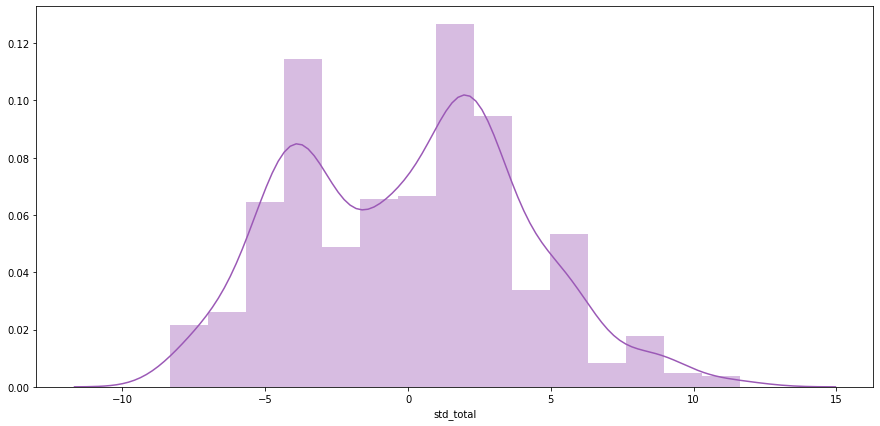

In [275]:
#looking at distribution of pokemon based on overll stat
sns.set_palette(flatui)
plt.figure(figsize=(15, 7))
df_st=df_poke.sort_values(by=['std_total'])
sns.distplot(df_st['std_total'])

In [276]:
#looking pokemon with weakest overall
print(df_poke.sort_values(by=['std_total']).loc[:,['name','attack','type1','type2']].head(10))
HTML(style+df_poke.sort_values(by=['std_total']).loc[:,['image','name','type1','type2','attack','defense','hp','sp_attack','sp_defense','speed','std_total','is_legendary']].head(10).to_html(classes='card-view-2',escape=False ,formatters=dict(image=path_to_image_html)))



           name  attack    type1   type2
190  Sunkern     30      grass    NaN   
297  Azurill     20      normal   fairy 
400  Kricketot   25      bug      NaN   
264  Wurmple     45      bug      NaN   
12   Weedle      35      bug      poison
9    Caterpie    30      bug      NaN   
279  Ralts       25      psychic  fairy 
663  Scatterbug  35      bug      NaN   
128  Magikarp    10      water    NaN   
788  Cosmog      29      psychic  NaN   


# Lets see how types compare against eachother


In [277]:
df_both_type =df_poke[(df_poke['type1']=='grass')|(df_poke['type2']=='grass')].iloc[:,11:29].mean().sort_values(ascending=False)

# df_both_type.columns=['against','value']
print(df_both_type)

capture_rate         4.686034e+227
experience_growth    1.060234e+06 
base_egg_steps       5.990928e+03 
base_total           4.114845e+02 
attack               7.439175e+01 
defense              7.173196e+01 
base_happiness       6.845361e+01 
hp                   6.538144e+01 
against_ice          2.061856e+00 
against_poison       1.804124e+00 
against_psychic      1.113402e+00 
against_rock         1.108247e+00 
against_steel        1.061856e+00 
height_m             9.708333e-01 
against_normal       9.123711e-01 
against_ground       5.515464e-01 
against_water        5.077320e-01 
dtype: float64


against_bug  against_dark  against_dragon  against_electric  \
type1                                                                   
bug       0.826389     0.979167      0.937500        1.138889           
dark      1.724138     0.534483      1.103448        1.103448           
dragon    0.944444     1.037037      2.000000        0.490741           
electric  0.871795     1.000000      0.897436        0.538462           
fairy     0.472222     0.500000      0.000000        1.111111           
fighting  0.535714     0.526786      0.982143        1.035714           
fire      0.456731     0.951923      1.009615        1.086538           
flying    0.500000     1.000000      1.666667        1.333333           
ghost     0.527778     1.925926      1.000000        0.888889           
grass     1.717949     0.967949      0.916667        0.532051           
ground    1.062500     1.078125      1.046875        0.000000           
ice       1.021739     1.130435      1.000000        1.086957           
normal    0.895238     1.000000      0.971429        1.233333           
poison    0.492188     0.921875      1.031250        1.109375           
psychic   1.716981     1.943396      0.877358        1.103774           
rock      0.988889     1.000000      0.966667        1.044444           
steel     0.531250     1.291667      0.458333        1.020833           
water     1.021930     1.017544      0.978070        1.903509           

          against_fairy  against_fight  against_fire  against_flying  \
type1                                                                  
bug       0.916667       0.458333       2.194444      2.083333         
dark      2.275862       1.965517       1.034483      1.034483         
dragon    2.111111       0.925926       0.509259      1.055556         
electric  0.948718       1.064103       1.102564      0.474359         
fairy     1.000000       0.472222       1.000000      1.000000         
fighting  2.035714       1.053571       1.071429      1.964286         
fire      0.572115       1.028846       0.495192      1.096154         
flying    1.666667       0.500000       0.666667      1.000000         
ghost     0.962963       0.000000       1.111111      1.185185         
grass     0.967949       0.916667       2.128205      2.038462         
ground    1.140625       1.078125       0.953125      0.921875         
ice       1.000000       1.739130       1.869565      1.000000         
normal    1.028571       1.685714       1.009524      1.038095         
poison    0.578125       0.515625       0.937500      1.093750         
psychic   1.000000       0.433962       1.028302      1.028302         
rock      1.044444       2.022222       0.555556      0.538889         
steel     0.541667       1.541667       1.833333      0.489583         
water     1.052632       0.995614       0.526316      1.030702         

          against_ghost  against_grass  against_ground  against_ice  \
type1                                                                 
bug       1.013889       0.420139       0.562500        1.208333      
dark      0.551724       0.775862       0.965517        1.206897      
dragon    1.074074       0.527778       0.925926        2.518519      
electric  0.974359       0.910256       2.051282        1.025641      
fairy     1.000000       0.944444       0.888889        1.111111      
fighting  1.053571       0.964286       1.000000        1.000000      
fire      0.971154       0.500000       1.846154        0.576923      
flying    1.000000       0.333333       0.000000        3.333333      
ghost     1.962963       0.814815       1.055556        1.314815      
grass     1.019231       0.432692       0.570513        2.115385      
ground    1.078125       2.000000       1.062500        2.281250      
ice       1.130435       1.217391       0.913043        0.576087      
normal    0.000000       0.880952       0.742857        1.280952      
poison    0.953125       0.523438       1.9

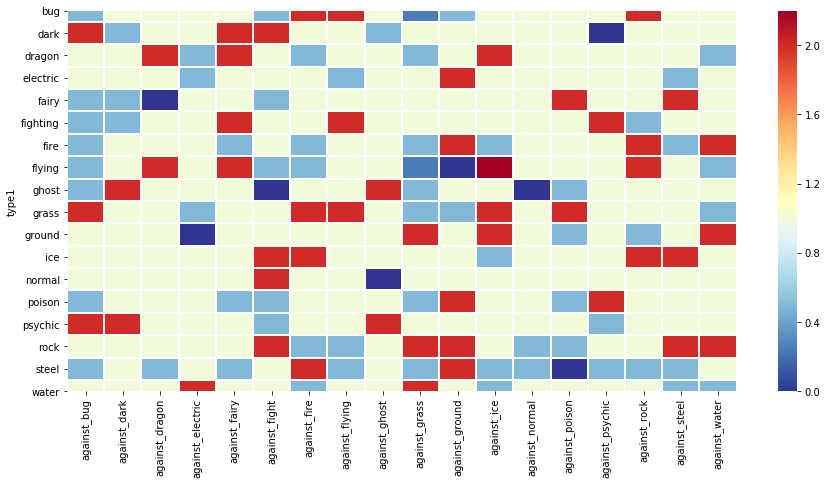

In [278]:
df_type_poke = df_poke[['type1','against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight' , 'against_fire' , 'against_flying' ,'against_ghost'  ,'against_grass' , 'against_ground'  ,'against_ice' ,'against_normal' , 'against_poison' , 'against_psychic','against_rock' ,'against_steel' , 'against_water']].append(df_poke[['type1','against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight' , 'against_fire' , 'against_flying' ,'against_ghost'  ,'against_grass' , 'against_ground'  ,'against_ice' ,'against_normal' , 'against_poison' , 'against_psychic','against_rock' ,'against_steel' , 'against_water']])
sns.set_palette(flatui)
plt.figure(figsize=(15, 7))
sns.heatmap(
    df_type_poke.groupby('type1').median().loc[:, 'against_bug':'against_water'], 
    linewidths=1,
    cmap='RdYlBu_r',
    vmin=0, vmax=2.2
);
df_type_poke.groupby('type1').mean()

In [279]:
 df_poke[['type1','against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight' , 'against_fire' , 'against_flying' ,'against_ghost'  ,'against_grass' , 'against_ground'  ,'against_ice' ,'against_normal' , 'against_poison' , 'against_psychic','against_rock' ,'against_steel' , 'against_water']].append(df_poke[['type1','against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight' , 'against_fire' , 'against_flying' ,'against_ghost'  ,'against_grass' , 'against_ground'  ,'against_ice' ,'against_normal' , 'against_poison' , 'against_psychic','against_rock' ,'against_steel' , 'against_water']]).groupby('type1').mean().loc['grass'].sort_values(ascending=False)

against_fire        2.128205
against_ice         2.115385
against_flying      2.038462
against_poison      1.846154
against_bug         1.717949
against_psychic     1.147436
against_steel       1.070513
against_rock        1.057692
against_ghost       1.019231
against_normal      0.967949
against_fairy       0.967949
against_dark        0.967949
against_fight       0.916667
against_dragon      0.916667
against_ground      0.570513
against_electric    0.532051
against_water       0.506410
against_grass       0.432692
Name: grass, dtype: float64

In [280]:

print('-----------------------------------------------------------------------')
poke_type  = input('''choose any type 
            \n'grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric'
            \n'ground' 'fairy' 'fighting' 'psychic' 
            \n'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel' 'flying'
            \nor input all for all the types''')
print('-----------------------------------------------------------------------')

def show_against(poke_type):
    
    type_list = ['grass' ,'fire', 'water', 'bug', 'normal' ,'poison' ,'electric' 'ground','fairy' ,'fighting' ,'psychic', 'rock' ,'ghost' ,'ice', 'dragon' ,'dark' ,'steel','flying']
      

    if not(poke_type.lower().strip() in type_list):
        raise ValueError(f'invaid stat : {stat} or invalid type : {type}')
    return(df_poke[['type1','against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight' , 'against_fire' , 'against_flying' ,'against_ghost'  ,'against_grass' , 'against_ground'  ,'against_ice' ,'against_normal' , 'against_poison' , 'against_psychic','against_rock' ,'against_steel' , 'against_water']].append(df_poke[['type1','against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight' , 'against_fire' , 'against_flying' ,'against_ghost'  ,'against_grass' , 'against_ground'  ,'against_ice' ,'against_normal' , 'against_poison' , 'against_psychic','against_rock' ,'against_steel' , 'against_water']]).groupby('type1').mean().loc['grass'].sort_values(ascending=False))    
   
print(show_against(poke_type))

-----------------------------------------------------------------------
choose any type 
            
'grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric'
            
'ground' 'fairy' 'fighting' 'psychic' 
            
'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel' 'flying'
            
or input all for all the typesdark
-----------------------------------------------------------------------
against_fire        2.128205
against_ice         2.115385
against_flying      2.038462
against_poison      1.846154
against_bug         1.717949
against_psychic     1.147436
against_steel       1.070513
against_rock        1.057692
against_ghost       1.019231
against_normal      0.967949
against_fairy       0.967949
against_dark        0.967949
against_fight       0.916667
against_dragon      0.916667
against_ground      0.570513
against_electric    0.532051
against_water       0.506410
against_grass       0.432692
Name: grass, dtype: float64


In [281]:

df_poke[['type1','type2','against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight' , 'against_fire' , 'against_flying' ,'against_ghost'  ,'against_grass' , 'against_ground'  ,'against_ice' ,'against_normal' , 'against_poison' , 'against_psychic','against_rock' ,'against_steel' , 'against_water']].groupby(['type1']).mean()

against_bug  against_dark  against_dragon  against_electric  \
type1                                                                   
bug       0.826389     0.979167      0.937500        1.138889           
dark      1.724138     0.534483      1.103448        1.103448           
dragon    0.944444     1.037037      2.000000        0.490741           
electric  0.871795     1.000000      0.897436        0.538462           
fairy     0.472222     0.500000      0.000000        1.111111           
fighting  0.535714     0.526786      0.982143        1.035714           
fire      0.456731     0.951923      1.009615        1.086538           
flying    0.500000     1.000000      1.666667        1.333333           
ghost     0.527778     1.925926      1.000000        0.888889           
grass     1.717949     0.967949      0.916667        0.532051           
ground    1.062500     1.078125      1.046875        0.000000           
ice       1.021739     1.130435      1.000000        1.086957           
normal    0.895238     1.000000      0.971429        1.233333           
poison    0.492188     0.921875      1.031250        1.109375           
psychic   1.716981     1.943396      0.877358        1.103774           
rock      0.988889     1.000000      0.966667        1.044444           
steel     0.531250     1.291667      0.458333        1.020833           
water     1.021930     1.017544      0.978070        1.903509           

          against_fairy  against_fight  against_fire  against_flying  \
type1                                                                  
bug       0.916667       0.458333       2.194444      2.083333         
dark      2.275862       1.965517       1.034483      1.034483         
dragon    2.111111       0.925926       0.509259      1.055556         
electric  0.948718       1.064103       1.102564      0.474359         
fairy     1.000000       0.472222       1.000000      1.000000         
fighting  2.035714       1.053571       1.071429      1.964286         
fire      0.572115       1.028846       0.495192      1.096154         
flying    1.666667       0.500000       0.666667      1.000000         
ghost     0.962963       0.000000       1.111111      1.185185         
grass     0.967949       0.916667       2.128205      2.038462         
ground    1.140625       1.078125       0.953125      0.921875         
ice       1.000000       1.739130       1.869565      1.000000         
normal    1.028571       1.685714       1.009524      1.038095         
poison    0.578125       0.515625       0.937500      1.093750         
psychic   1.000000       0.433962       1.028302      1.028302         
rock      1.044444       2.022222       0.555556      0.538889         
steel     0.541667       1.541667       1.833333      0.489583         
water     1.052632       0.995614       0.526316      1.030702         

          against_ghost  against_grass  against_ground  against_ice  \
type1                                                                 
bug       1.013889       0.420139       0.562500        1.208333      
dark      0.551724       0.775862       0.965517        1.206897      
dragon    1.074074       0.527778       0.925926        2.518519      
electric  0.974359       0.910256       2.051282        1.025641      
fairy     1.000000       0.944444       0.888889        1.111111      
fighting  1.053571       0.964286       1.000000        1.000000      
fire      0.971154       0.500000       1.846154        0.576923      
flying    1.000000       0.333333       0.000000        3.333333      
ghost     1.962963       0.814815       1.055556        1.314815      
grass     1.019231       0.432692       0.570513        2.115385      
ground    1.078125       2.000000       1.062500        2.281250      
ice       1.130435       1.217391       0.913043        0.576087      
normal    0.000000       0.880952       0.742857        1.280952      
poison    0.953125       0.523438       1.9

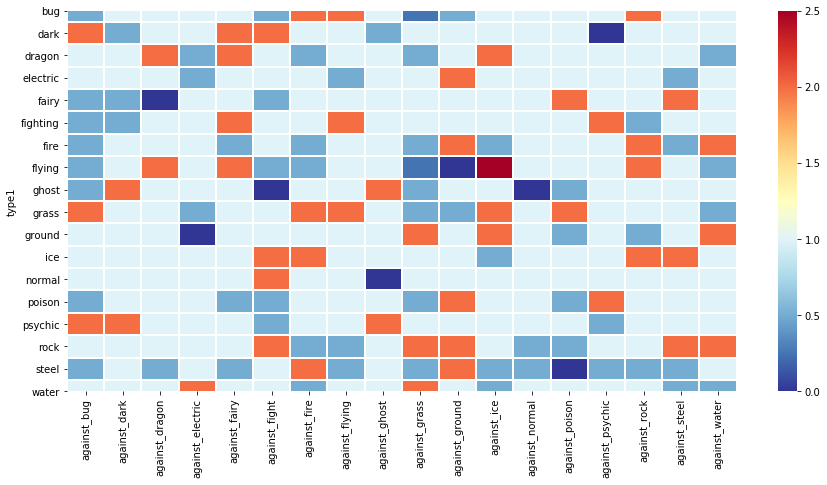

In [282]:
df_against = df_poke[['type1','against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight' , 'against_fire' , 'against_flying' ,'against_ghost'  ,'against_grass' , 'against_ground'  ,'against_ice' ,'against_normal' , 'against_poison' , 'against_psychic','against_rock' ,'against_steel' , 'against_water']]
sns.set_palette(flatui)
plt.figure(figsize=(15, 7))
sns.heatmap(
    df_poke.groupby('type1').median().loc[:, 'against_bug':'against_water'], 
    linewidths=1,
    cmap='RdYlBu_r',
    vmin=0, vmax=2.5
);

In [283]:
# print(df_poke.loc[:,['name','type1','type1','is_legendary','generation']])
# plt.figure(figsize=(9, 20))
# sns.set_palette(flatui)
# ax = sns.countplot(y="type1", hue="is_legendary", data=df_poke)
df_poke[['type1','type2','against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight' , 'against_fire' , 'against_flying' ,'against_ghost'  ,'against_grass' , 'against_ground'  ,'against_ice' ,'against_normal' , 'against_poison' , 'against_psychic','against_rock' ,'against_steel' , 'against_water']].groupby(['type1','type2']).mean()

against_bug  against_dark  against_dragon  against_electric  \
type1 type2                                                                   
bug   electric  1.0          1.0           1.0             0.5                
      fairy     0.5          0.5           0.0             1.0                
      fighting  0.5          0.5           1.0             1.0                
      fire      0.5          1.0           1.0             1.0                
      flying    0.5          1.0           1.0             2.0                
...             ...          ...           ...             ...                
water ice       1.0          1.0           1.0             2.0                
      poison    0.5          1.0           1.0             2.0                
      psychic   2.0          2.0           1.0             2.0                
      rock      1.0          1.0           1.0             2.0                
      steel     0.5          1.0           0.5             2.0                

                against_fairy  against_fight  against_fire  against_flying  \
type1 type2                                                                  
bug   electric  1.0            0.50           2.00          1.0              
      fairy     1.0            0.25           2.00          2.0              
      fighting  2.0            0.50           2.00          4.0              
      fire      0.5            0.50           1.00          2.0              
      flying    1.0            0.25           2.00          2.0              
...             ...             ...            ...          ...              
water ice       1.0            2.00           1.00          1.0              
      poison    0.5            0.50           0.50          1.0              
      psychic   1.0            0.50           0.50          1.0              
      rock      1.0            2.00           0.25          0.5              
      steel     0.5            2.00           1.00          0.5              

                against_ghost  against_grass  against_ground  against_ice  \
type1 type2                                                                 
bug   electric  1.0            0.50           1.0             1.00          
      fairy     1.0            0.50           0.5             1.00          
      fighting  1.0            0.50           0.5             1.00          
      fire      1.0            0.25           1.0             0.50          
      flying    1.0            0.25           0.0             2.00          
...             ...             ...           ...              ...          
water ice       1.0            2.00           1.0             0.25          
      poison    1.0            1.00           2.0             0.50          
      psychic   2.0            2.00           1.0             0.50          
      rock      1.0            4.00           2.0             0.50          
      steel     1.0            1.00           2.0             0.25          

                against_normal  against_poison  against_psychic  against_rock  \
type1 type2                                                                     
bug   electric  1.0             1.0             1.0              2.0            
      fairy     1.0             2.0             1.0              2.0            
      fighting  1.0             1.0             2.0              1.0            
      fire      1.0             1.0             1.0              4.0            
      flying    1.0             1.0             1.0              4.0            
...             ...             ...             ...              ...            
water ice       1.0             1.0             1.0              2.0            
      poison    1.0             0.5             2.0              1.0            
      psychic   1.0             1.0             0.5              1.0            
      rock      0.5             0.5             1.0              1.0            

0     -3.723637
1     -0.780640
2      6.525074
3     -4.050618
4     -0.801163
         ...   
796    4.744986
797    4.384500
798    5.211531
799    5.677944
800    5.659028
Name: std_total, Length: 801, dtype: float64


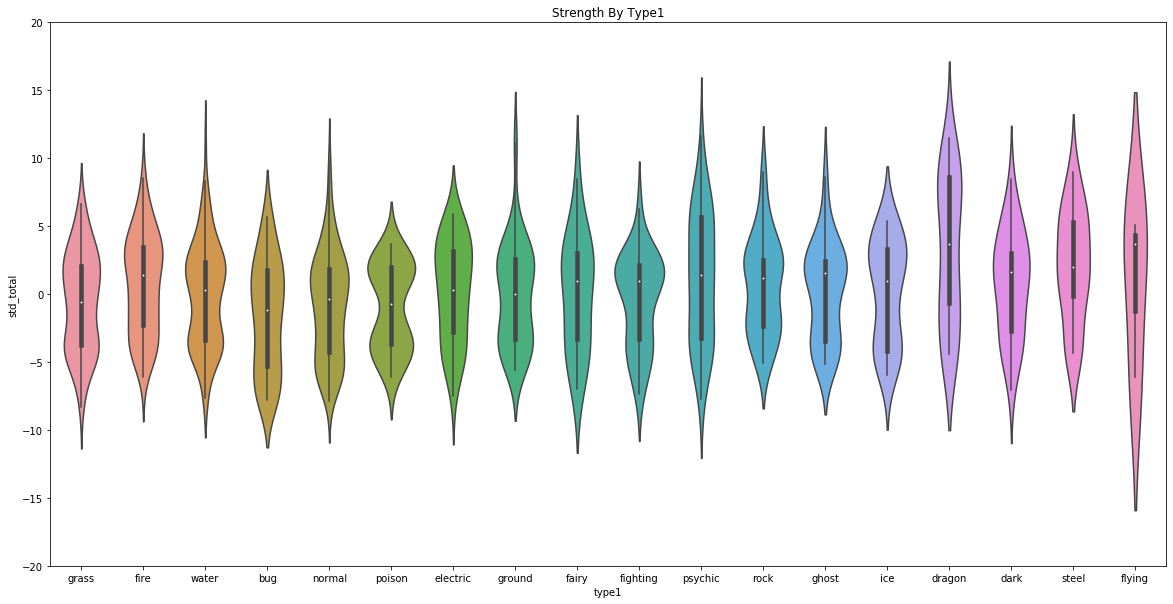

In [288]:
#violinplot of strength by type1
print(df_poke['std_total'])
plt.subplots(figsize = (20,10))
plt.title('Strength By Type1')
sns.violinplot(x = "type1", y = "std_total",data = df_poke)
plt.ylim(-20,20)
plt.show()

0     -3.723637
1     -0.780640
2      6.525074
3     -4.050618
4     -0.801163
         ...   
796    4.744986
797    4.384500
798    5.211531
799    5.677944
800    5.659028
Name: std_total, Length: 801, dtype: float64


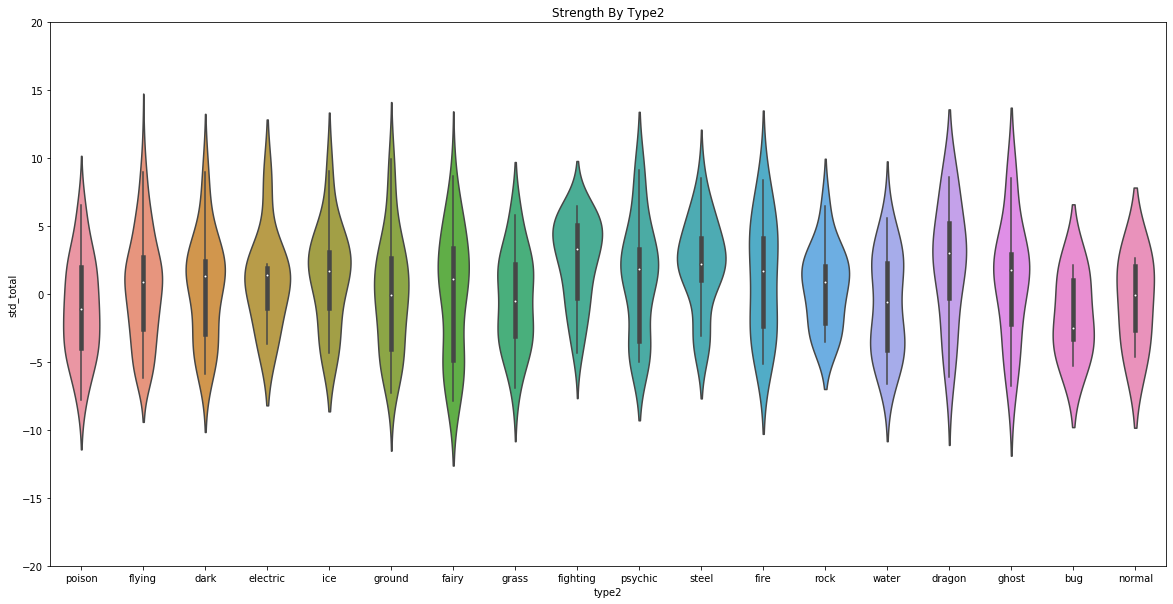

In [289]:
#violinplot of strength by type2
print(df_poke['std_total'])
plt.subplots(figsize = (20,10))
plt.title('Strength By Type2')
sns.violinplot(x = "type2", y = "std_total",data = df_poke)
plt.ylim(-20,20)
plt.show()

0     -3.723637
1     -0.780640
2      6.525074
3     -4.050618
4     -0.801163
         ...   
796    4.744986
797    4.384500
798    5.211531
799    5.677944
800    5.659028
Name: std_total, Length: 801, dtype: float64


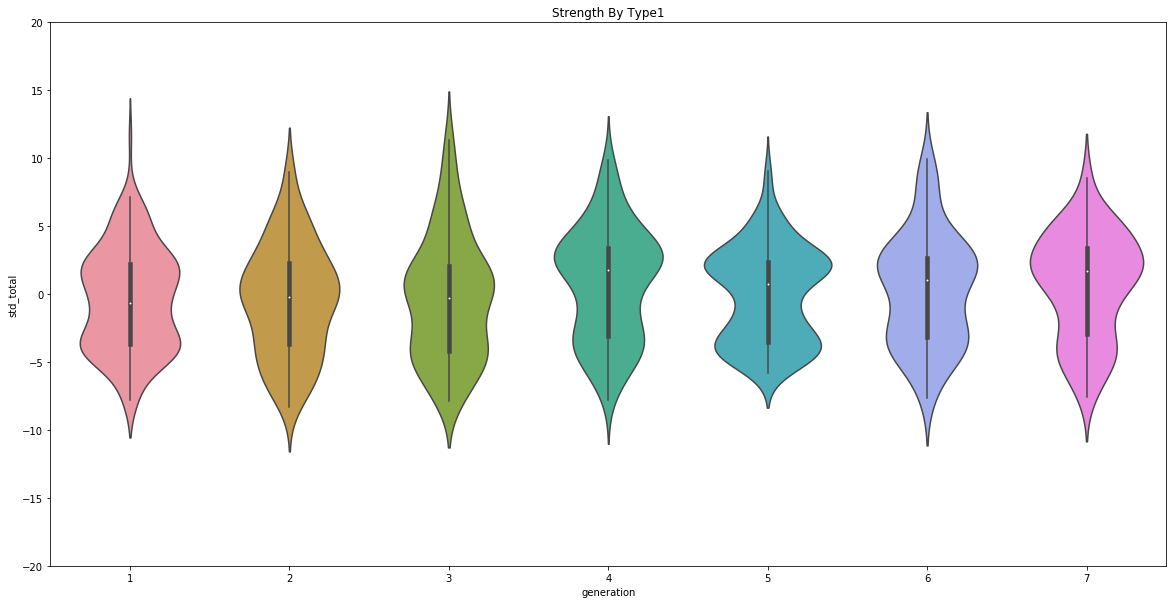

In [294]:
#violinplot of strength by generation
print(df_poke['std_total'])
plt.subplots(figsize = (20,10))
plt.title('Strength By Type1')
sns.violinplot(x = "generation", y = "std_total",data = df_poke)
plt.ylim(-20,20)
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
top_types=df['type1'].value_counts()[:10] #take the top 10 Types
df1=df[df['type1'].isin(top_types.index)] #take the pokemons of the type with highest numbers, top 10
sns.swarmplot(x='type1',y='std_total',data=df_poke,hue='is_legendary') # this plot shows the points belonging to individual pokemons
# It is distributed by Type
plt.axhline(df1['std_total'].mean(),color='red',linestyle='dashed')
plt.show()

In [302]:
 ax = sns.lineplot(x="generation", hue="type1",data=df_poke.groupby('type1'))

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).